In [331]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [342]:
class NN:
    def __init__(self, shape, dna=None):
        self.shape = shape
        self.w = []
        if dna is None:
            self.gen_weights()
        else:
            self.dna(dna)

    def gen_weights(self, random=True):
        self.w = []
        for i in range(len(self.shape) -1):
            w = np.zeros((self.shape[i+1] + 1, self.shape[i] + 1))
            if random:
                w[:-1] = np.random.random((self.shape[i+1], self.shape[i]+1)) * 2 -1
            w[-1, -1] = 1
            
            self.w.append(w)

    def process(self, data):
        if len(data) != self.shape[0]:
            raise Exception('entrada com tamanho diferente to esperado')
        z = np.zeros(self.shape[0] + 1)
        z[:self.shape[0]] = data
        z[-1] = 1
        
        for w in self.w[:-1]:
            z = self.foward(w, z, func=self.relu)
        z = self.foward(self.w[-1], z, func=np.sum)
        
        return z[:-1]
                                 
    def foward(self, w, z, func=None):
        z = np.dot(w, z)
        if func is None:
            z[:-1] = self.relu(z[:-1])
        else:
            z[:-1] = func(z[:-1])
        return z
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def relu(self, z):
        z[z<0] = 0
        return z
    
    def softplus(self, z):
        return np.log(1 + np.exp(z))
    
    def softmax(self, z):
        return z/z.sum()
    
    def dna(self, dna=None):
        if dna is None:
            # retorna os parametros como uma lista
            return np.concatenate([w[:-1].reshape(-1) for w in nn.w])
        else:
            # atribui os parametros a partir de um lista
            dna = np.array(dna)
            self.gen_weights(random=False)
            i = 0
            for j in range(len(self.shape) -1):
                new_i = i + (self.shape[j]+1)*self.shape[j+1]
                self.w[j][:-1] = dna[i:new_i].reshape(self.shape[j+1], -1)
                i = new_i
            
        

In [347]:
class Pop():
    def __init__(self, species, size, **kwargs):
        self.species = species
        self.size = size
        self.pop = [species(**kwargs) for _ in range(size)]
        self.fitness = []
        self.gen = 0

    def next_gen(self):
        self.gen += 1
        total_fit = sum(self.fitness)
        prob = [fit/total_fit for fit in self.fitness]
        
        self.pop = [self.species(self.pop[0].shape, self.sex(prob)) for _ in range(self.size)]

    def sex(self, weights):
        parents = random.choices(self.pop, weights=weights, k=2)
        parents = [p.dna() for p in parents]
        select = np.random.randint(0,2, len(parents[0]))
        dna = [parents[select[i]][i] for i in range(len(parents[0]))]
        # mutacao
        if random.random() < 0.02:
            i = random.randint(0, len(dna))
            dna[i] = np.random.randn()
        return dna
    
#     def sex2(self, weights):
#         parents = random.choices(pop.pop, weights=weights, k=2)
#         cut = random.randint(0, self.size-1)
#         child = parents[0].dna[:cut] + parents[1].dna[cut:]
#         # mutacao
#         if random.random() < 0.01:
#             i = random.randint(0,self.cell_size-1)
#             child = child[:i] + random.choice(self.pool) + child[i+1:]
#         return child
            

            

In [361]:
def calc_fitness(x, y, pop):
    fit  = []
    for c in pop.pop:
        yy = [c.process([i])[0] for i in x]
        fit.append(np.sum((yy-y)**2))
    pop.fitness = fit

x = np.linspace(-2, 2, 15) + np.random.randn(15) * 0.05
y = np.exp(-x**2) + np.random.randn(15) * 0.05
xx = np.linspace(-2, 2, 100)

pop = Pop(NN, 100, shape=(1, 4, 4, 1))
calc_fitness(x, y, pop)
fitness = max(pop.fitness)
# print(pop.fitness)
while pop.gen < 100:
    pop.next_gen()
    calc_fitness(x, y, pop)
    fitness = max(pop.fitness)
    if pop.gen % 10 == 0:
        print(pop.gen, fitness)


IndexError: list assignment index out of range

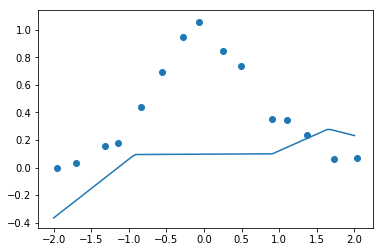

In [358]:
x = np.linspace(-2, 2, 15) + np.random.randn(15) * 0.05
y = np.exp(-x**2) + np.random.randn(15) * 0.05

# nn = NN((1, 4, 4, 1))
nn = pop.pop[3]
xx = np.linspace(-2, 2, 100)
plt.scatter(x, y)
yy = [nn.process([x])[0] for x in xx]
plt.plot(xx, yy)

In [359]:
pop.fitness

[3.485612656018638,
 3.485612656018638,
 3.485612656018638,
 3.485612656018638,
 3.485612656018638]